<a href="https://colab.research.google.com/github/tokaalaa/DM_Course/blob/main/DM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Import the dependencies
import re
import numpy
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#2-Generate the Data Matrix and the Label vector

In [ ]:
def read_pgm(filename):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    
    return numpy.frombuffer(buffer,
                            dtype='u1',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).flatten()
Data_Matrix = [] 
label = []                           
for j in range(40):                            
  for i in range(10):
    image = read_pgm("/content/drive/My Drive/Face_Recognition/orl_dataset/s"+ str(j+1)+ "/" + str(i+1) + ".pgm")
    label.append(j+1)
    Data_Matrix.append(image)
  

In [ ]:
Data_Matrix = np.array(Data_Matrix)
print(Data_Matrix.shape)

(400, 10304)


In [ ]:
label = np.array(label)
print(label.shape)

(400,)


#3-Split the Dataset into Training and Test sets

In [ ]:
def split_data(Data_Matrix, label,way = 1):
    if way == 1:
      Train_Data, Test_Data = Data_Matrix[::2], Data_Matrix[1::2]
      Train_Label, Test_Label = label[::2], label[1::2]
    else:
      Train_Data, Test_Data, Train_Label, Test_Label = train_test_split(Data_Matrix, label, 
                                                    train_size=0.7)
    return Train_Data, Test_Data, Train_Label, Test_Label

In [ ]:
Train_Data, Test_Data, Train_Label, Test_Label = split_data(Data_Matrix, label,way = 1)

print(Train_Data.shape)
print(Train_Label.shape)

(200, 10304)
(200,)


#4-Classification using PCA

In [ ]:
def PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha, k = 1):
    mean = numpy.mean(Train_Data, axis=0)
    Z = Train_Data - mean
    COV = (np.dot(Z.T,Z)) / Z.shape[0]
    eigvals, eigvecs = np.linalg.eigh(COV)
    eigvals = np.diag(eigvals)
    
    explained_variances = []
    for i in range(len(eigvals)):
      explained_variances.append(np.diag(eigvals)[i] / np.sum(np.diag(eigvals)))
    
    explained_variances.reverse()
    eigvecs[:] = eigvecs[::-1]

    out = 0
    for i in range(len(explained_variances)):
      out = out + explained_variances[i]
      if out > alpha:
        break
    
    reduceEigvecs = eigvecs.T[i]
    for j in range(i):
      reduceEigvecs = np.vstack((reduceEigvecs.T,eigvecs.T[i-1-j])).T
    
    A = np.dot(reduceEigvecs.T ,Train_Data.T)
    
    A2 = np.dot(reduceEigvecs.T ,Test_Data.T)

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(A.T, Train_Label)
    #Predict the response for test dataset
    y_pred = knn.predict(A2.T)

    return y_pred

##For k = 1

In [ ]:
y_pred = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.99, k = 1)

##d- Accuracy for every value of alpha separately

In [ ]:
#for 0.8
print(classification_report(Test_Label, y_pred))
accuracy_score(Test_Label, y_pred)

              precision    recall  f1-score   support

           1       0.33      0.20      0.25         5
           2       1.00      0.40      0.57         5
           3       0.38      0.60      0.46         5
           4       1.00      0.60      0.75         5
           5       0.25      0.80      0.38         5
           6       0.75      0.60      0.67         5
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         5
           9       0.60      0.60      0.60         5
          10       1.00      0.60      0.75         5
          11       0.75      0.60      0.67         5
          12       0.75      0.60      0.67         5
          13       1.00      0.20      0.33         5
          14       1.00      0.60      0.75         5
          15       0.75      0.60      0.67         5
          16       0.67      0.40      0.50         5
          17       0.60      0.60      0.60         5
          18       0.67    

0.59

In [ ]:
#for 0.85
print(classification_report(Test_Label, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.20      0.29         5
           2       1.00      0.40      0.57         5
           3       0.43      0.60      0.50         5
           4       1.00      0.60      0.75         5
           5       0.33      1.00      0.50         5
           6       0.71      1.00      0.83         5
           7       0.83      1.00      0.91         5
           8       1.00      0.80      0.89         5
           9       1.00      0.80      0.89         5
          10       1.00      0.80      0.89         5
          11       1.00      0.40      0.57         5
          12       0.75      0.60      0.67         5
          13       1.00      0.40      0.57         5
          14       1.00      0.60      0.75         5
          15       0.60      0.60      0.60         5
          16       1.00      0.80      0.89         5
          17       0.57      0.80      0.67         5
          18       0.75    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(Test_Label, y_pred)

0.63

In [ ]:
#for 0.9
print(classification_report(Test_Label, y_pred))
accuracy_score(Test_Label, y_pred)

              precision    recall  f1-score   support

           1       0.50      0.20      0.29         5
           2       1.00      0.40      0.57         5
           3       0.67      0.80      0.73         5
           4       0.75      0.60      0.67         5
           5       0.31      0.80      0.44         5
           6       0.80      0.80      0.80         5
           7       0.83      1.00      0.91         5
           8       0.83      1.00      0.91         5
           9       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      0.60      0.75         5
          12       1.00      0.60      0.75         5
          13       1.00      0.40      0.57         5
          14       1.00      0.60      0.75         5
          15       0.80      0.80      0.80         5
          16       0.80      0.80      0.80         5
          17       0.80      0.80      0.80         5
          18       0.50    

0.665

In [ ]:
#for 0.95
print(classification_report(Test_Label, y_pred))
accuracy_score(Test_Label, y_pred)

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      0.80      0.89         5
           3       0.71      1.00      0.83         5
           4       1.00      0.80      0.89         5
           5       0.33      0.80      0.47         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       0.80      0.80      0.80         5
           9       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      0.60      0.75         5
          14       1.00      0.60      0.75         5
          15       0.80      0.80      0.80         5
          16       1.00      0.80      0.89         5
          17       1.00      1.00      1.00         5
          18       0.67    

0.74

In [ ]:
#for 0.99
print(classification_report(Test_Label, y_pred))
accuracy_score(Test_Label, y_pred)

              precision    recall  f1-score   support

           1       1.00      0.40      0.57         5
           2       1.00      0.60      0.75         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       0.29      0.80      0.42         5
           6       0.83      1.00      0.91         5
           7       1.00      1.00      1.00         5
           8       0.62      1.00      0.77         5
           9       1.00      0.60      0.75         5
          10       1.00      0.80      0.89         5
          11       1.00      0.80      0.89         5
          12       1.00      1.00      1.00         5
          13       1.00      0.80      0.89         5
          14       1.00      0.80      0.89         5
          15       1.00      0.80      0.89         5
          16       0.75      0.60      0.67         5
          17       1.00      1.00      1.00         5
          18       0.75    

0.77

##e- relation between alpha and the classification accuracy

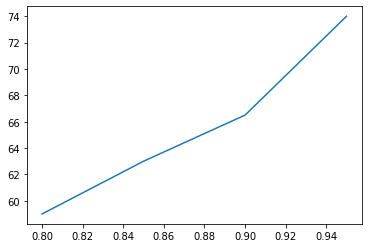

In [ ]:
from matplotlib import pyplot as plt

plt.plot([0.8, 0.85, 0.9, 0.95], [59, 63, 66.5, 74])

## For k = 3

In [ ]:
y_pred1 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.95, k = 3)
y_pred2 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.9, k = 3)
y_pred3 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.85, k = 3)
y_pred4 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.8, k = 3)

In [ ]:
acc1 = accuracy_score(Test_Label, y_pred1)
acc2 = accuracy_score(Test_Label, y_pred2)
acc3 = accuracy_score(Test_Label, y_pred3)
acc4 = accuracy_score(Test_Label, y_pred4)

0.6
0.56
0.515
0.44


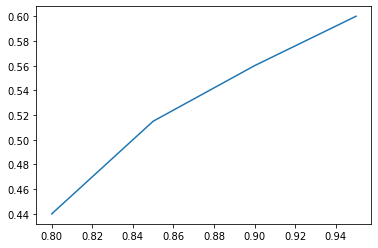

In [ ]:
print(acc1)
print(acc2)
print(acc3)
print(acc4)

plt.plot([0.8, 0.85, 0.9, 0.95], [acc4, acc3, acc2, acc1])

##For k = 5

In [ ]:
y_pred1 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.95, k = 5)
y_pred2 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.9, k = 5)
y_pred3 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.85, k = 5)
y_pred4 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.8, k = 5)

In [ ]:
acc51 = accuracy_score(Test_Label, y_pred1)
acc52 = accuracy_score(Test_Label, y_pred2)
acc53 = accuracy_score(Test_Label, y_pred3)
acc54 = accuracy_score(Test_Label, y_pred4)

0.585
0.555
0.45
0.445


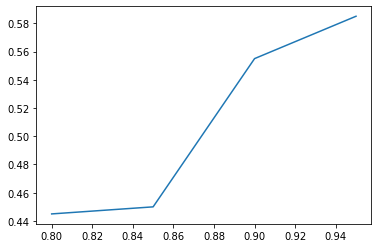

In [ ]:
print(acc51)
print(acc52)
print(acc53)
print(acc54)

plt.plot([0.8, 0.85, 0.9, 0.95], [acc54, acc53, acc52, acc51])

##For k = 7

In [ ]:
y_pred1 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.95, k = 7)
y_pred2 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.9, k = 7)
y_pred3 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.85, k = 7)
y_pred4 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.8, k = 7)

In [ ]:
acc71 = accuracy_score(Test_Label, y_pred1)
acc72 = accuracy_score(Test_Label, y_pred2)
acc73 = accuracy_score(Test_Label, y_pred3)
acc74 = accuracy_score(Test_Label, y_pred4)

0.545
0.51
0.4
0.415


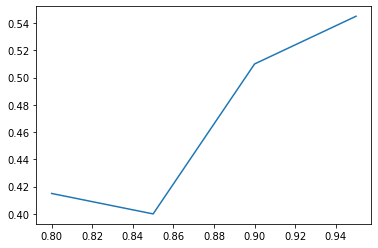

In [ ]:
print(acc71)
print(acc72)
print(acc73)
print(acc74)

plt.plot([0.8, 0.85, 0.9, 0.95], [acc74, acc73, acc72, acc71])

##Plot accuracy against the K value

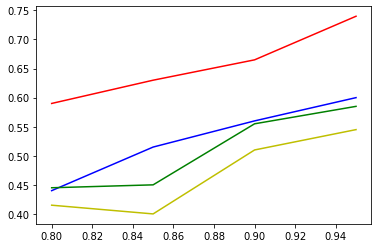

In [ ]:
import matplotlib.pyplot as plt

plt.plot([0.8, 0.85, 0.9, 0.95], [0.59, 0.63, 0.665, 0.74], 'r') # for k = 1
plt.plot([0.8, 0.85, 0.9, 0.95], [0.44, 0.515, 0.56, 0.6], 'b') # for k = 3
plt.plot([0.8, 0.85, 0.9, 0.95], [0.445, 0.45, 0.555, 0.585], 'g') # for k = 5
plt.plot([0.8, 0.85, 0.9, 0.95], [0.415, 0.4, 0.51, 0.545],'y') # for k = 7 
plt.show()

##For split with 70%

In [ ]:
Train_Data, Test_Data, Train_Label, Test_Label = split_data(Data_Matrix, label,way = 0)

In [ ]:
y_pred1 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.95, k = 1)
y_pred2 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.9, k = 1)
y_pred3 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.85, k = 1)
y_pred4 = PCA(Train_Data, Test_Data, Train_Label, Test_Label, alpha=0.8, k = 1)

In [ ]:
acc12 = accuracy_score(Test_Label, y_pred1)
acc22 = accuracy_score(Test_Label, y_pred2)
acc32 = accuracy_score(Test_Label, y_pred3)
acc42 = accuracy_score(Test_Label, y_pred4)

0.7166666666666667
0.7166666666666667
0.7083333333333334
0.5833333333333334


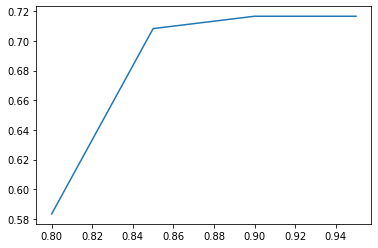

In [ ]:
print(acc12)
print(acc22)
print(acc32)
print(acc42)

plt.plot([0.8, 0.85, 0.9, 0.95], [acc42, acc32, acc22, acc12])

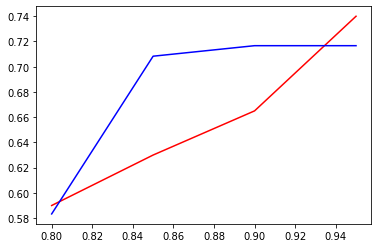

In [ ]:
plt.plot([0.8, 0.85, 0.9, 0.95], [0.59, 0.63, 0.665, 0.74], 'r') #for 50%
plt.plot([0.8, 0.85, 0.9, 0.95], [0.583, 0.708, 0.717, 0.717], 'b') #for 70%
plt.show()

In [ ]:
Train_Data2 =Train_Data.reshape(40,5, -1)
mean = numpy.mean(Train_Data2, axis=1)
print(mean.shape)
overall_mean = numpy.mean(mean, axis=0)
print(overall_mean)
m = numpy.mean(Train_Data, axis=0)
print(m)
Z = Train_Data2 - mean.reshape(40,1,-1)
print(Z.shape)
print(Z.T.shape)
(Z[0].T@Z[0]).shape

(40, 10304)
[86.115 86.265 86.685 ... 76.5   77.395 77.085]
[86.115 86.265 86.685 ... 76.5   77.395 77.085]
(40, 5, 10304)
(10304, 5, 40)


(10304, 10304)

# **5-LDA**

## **Algorithm**

In [ ]:
def LDA(Train_Data, Test_Data, Train_Label, Test_Label, NClassSamples = 5):
    m,n = Train_Data.shape
    Nclasses = int(m / NClassSamples)
    Train_Data =Train_Data.reshape(Nclasses, NClassSamples, -1)
    mean = numpy.mean(Train_Data, axis=1)
    overall_mean = numpy.mean(mean, axis=0)

    Sb = np.zeros((n,n))
    for i in range(Nclasses):
      Sb+= NClassSamples * (mean[i] - overall_mean) @ (mean[i] - overall_mean).T

    Z = Train_Data - mean.reshape(40,1,-1)
    S = np.zeros((n,n))
    for i in range(Nclasses):
      S+= Z[i].T@Z[i]

    eigvals, w = np.linalg.eigh(np.linalg.inv(S)@Sb)

 

    return eigvals, w

In [ ]:
eigvals, w = LDA(Train_Data, Test_Data, Train_Label, Test_Label)

In [ ]:
U = np.flip(w,axis=1)[:,0:39]
projected_Train_Data = Train_Data @ U
projected_Test_Data = Test_Data @ U

In [ ]:
def KNN_prediction(k = 1):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(projected_Train_Data, Train_Label)
    #Predict the response for test dataset
    y_pred = knn.predict(projected_Test_Data)

    return np.sum(Test_Label == y_pred)/Test_Label.shape[0] * 100

## **Prediction**

### **For k = 1**

In [ ]:
accuracy_k1 =  KNN_prediction()
accuracy_k1

88.33333333333333

### **For k = 3**

In [ ]:
accuracy_k3 =  KNN_prediction(3)
accuracy_k3

77.5

### **For k = 5**

In [ ]:
accuracy_k5 =  KNN_prediction(5)
accuracy_k5

65.83333333333333

### **For k = 7**

In [ ]:
accuracy_k7 =  KNN_prediction(7)
accuracy_k7

60.83333333333333

## **Plot the accuracy againist the k value**

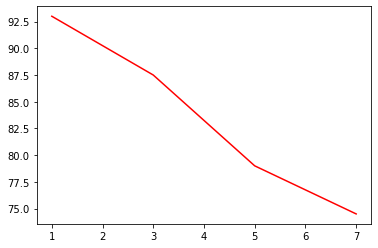

In [ ]:
import matplotlib.pyplot as plt
# for 50% split
plt.plot([1, 3, 5, 7], [accuracy_k1, accuracy_k3, accuracy_k5, accuracy_k7], 'r')
plt.show()

## **Bonus: Split with 70%**

In [ ]:
eigvals, w = LDA(Train_Data, Test_Data, Train_Label, Test_Label, NClassSamples = 7)

In [ ]:
U = np.flip(w,axis=1)[:,0:39]
projected_Train_Data = Train_Data @ U
projected_Test_Data = Test_Data @ U

## **Prediction**

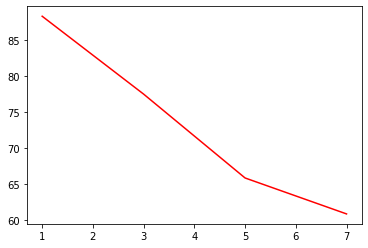

In [ ]:
import matplotlib.pyplot as plt
# for 70% split
plt.plot([1, 3, 5, 7], [accuracy_k1, accuracy_k3, accuracy_k5, accuracy_k7], 'r')
plt.show()